In [1]:
### Stock Analysis 

In [2]:
# Dependencies 
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import pandas_datareader.data as web
from sklearn import datasets
from scipy.stats import linregress

style.use('fivethirtyeight')

/Users/rolandonavarro/opt/anaconda3/lib/python3.7/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [3]:
# Read CSV Files
aapl_df=pd.read_csv("../Data/apple.csv", index_col=[0], parse_dates=True)
sp5_df = pd.read_csv("../Data/ap5.csv", index_col=[0], parse_dates=True)
gold_df = pd.read_csv("../Data/gold.csv", index_col=[0], parse_dates=True)
oil_df = pd.read_csv("../Data/oil.csv", index_col=[0], parse_dates=True)
ed_df = pd.read_csv("../Data/ed.csv", index_col=[0], parse_dates=True)

In [4]:
oil_df

,High,Low,Open,Close,Volume,Adj Close,Change
Date,,,,,,,
2020-02-16,52.410000,52.099998,52.200001,52.180000,0.019935,52.180000,-0.038315
2020-02-18,52.410000,50.880001,52.230000,52.049999,0.607343,52.049999,-0.344630
2020-02-19,53.660000,51.930000,52.119999,53.290001,0.221774,53.290001,2.244823
2020-02-20,54.500000,53.220001,53.500000,53.779999,0.113683,53.779999,0.523362
2020-02-21,53.860001,52.549999,53.740002,53.380001,0.676179,53.380001,-0.669893
2020-02-23,52.639999,51.660000,52.599998,52.080002,1.339288,52.080002,-0.988587
2020-02-24,52.639999,50.450001,52.599998,51.430000,0.707555,51.430000,-2.224331
2020-02-25,52.020000,49.689999,51.369999,49.900002,0.765515,49.900002,-2.861587
2020-02-26,50.439999,48.299999,50.080002,48.730000,0.764989,48.730000,-2.695691


In [5]:
# Drop index to plot Volume vs Price change
d_index = aapl_df.reset_index()
# aapl_df[['Volume','Change']]
aapl_plot = d_index[['Volume','Change']]


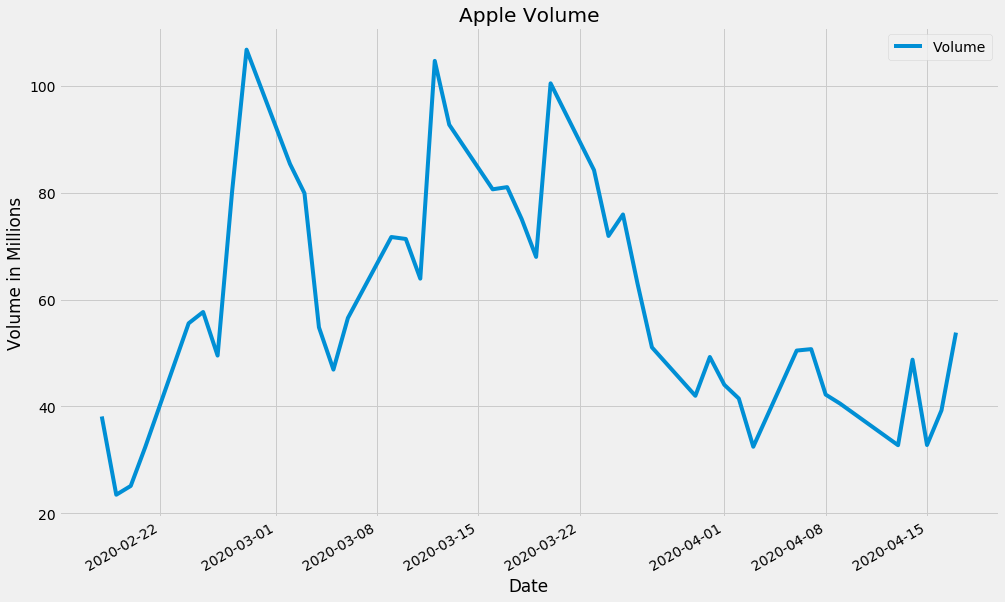

In [6]:
# Apple volume Graph
avol_df = pd.DataFrame(aapl_df['Volume'])
avol_df.plot(figsize=(15, 10))
plt.title('Apple Volume')
plt.ylabel('Volume in Millions')
plt.savefig('../WebVisualization/assets/aapl_volume.png')

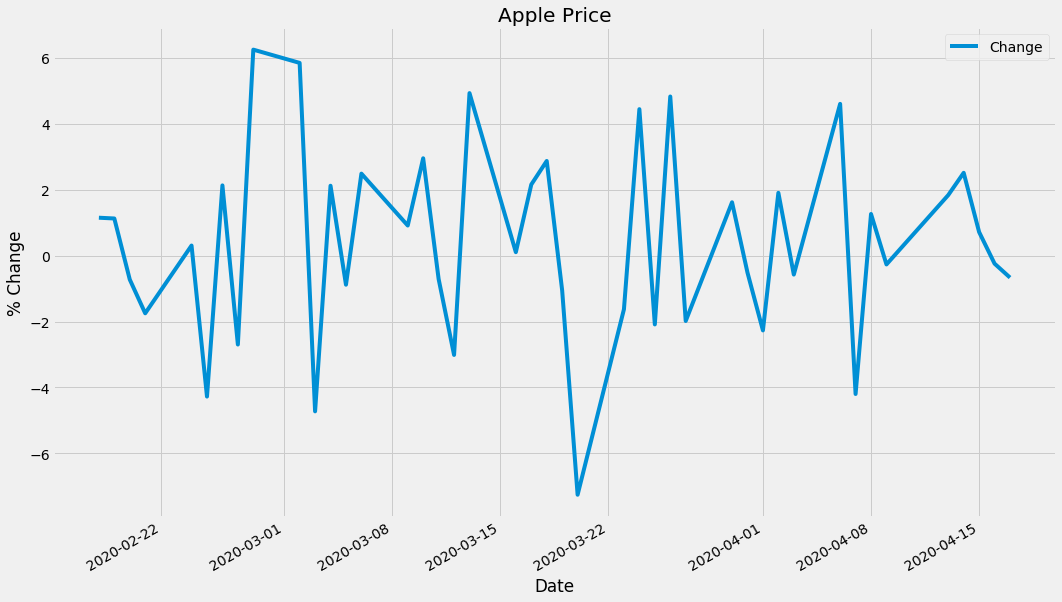

In [7]:
# Apple price change 
apch_df = pd.DataFrame(aapl_df['Change'])
apch_df.plot(figsize=(16, 10))
plt.title('Apple Price')
plt.ylabel('% Change')
plt.savefig('../WebVisualization/assets/aapl_price.png')

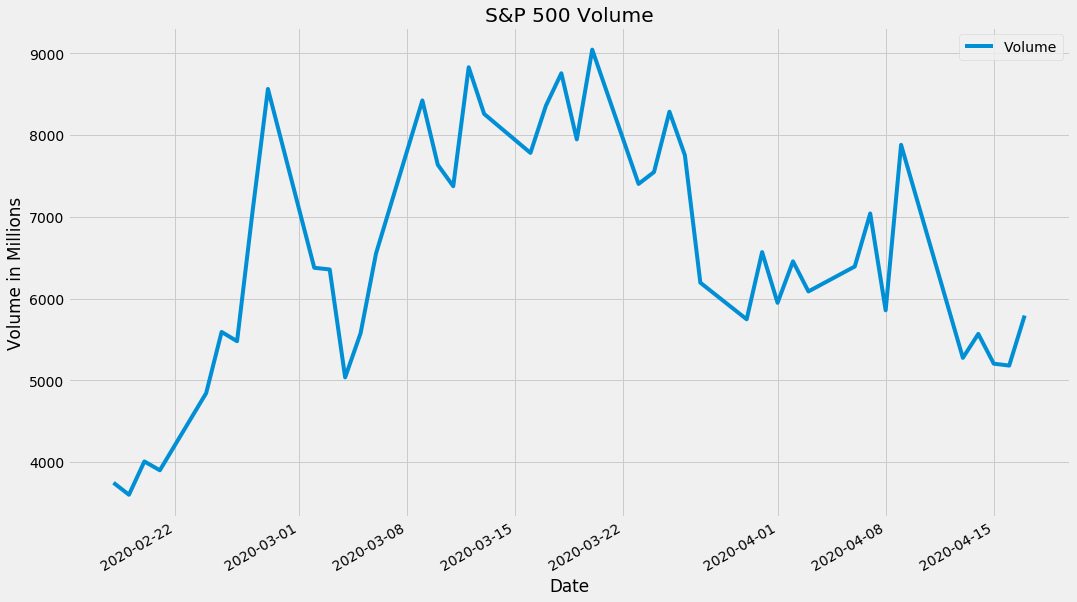

In [8]:
# S&P 500 Volume Graph
sp5_vol = pd.DataFrame(sp5_df['Volume'])
sp5_vol.plot(figsize=(16,10))
plt.title('S&P 500 Volume')
plt.ylabel('Volume in Millions')
plt.savefig('../WebVisualization/assets/sp5_volume.png')

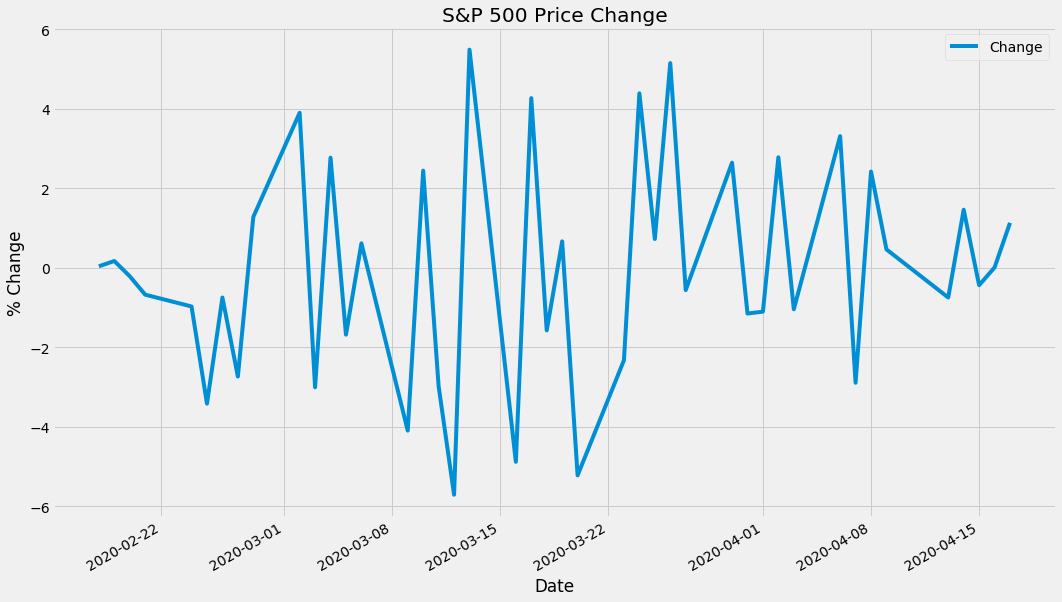

In [9]:
# S&P 500 Price Change Graph
sp5_p = pd.DataFrame(sp5_df['Change'])
sp5_p.plot(figsize=(16,10))
plt.title('S&P 500 Price Change')
plt.ylabel('% Change')
plt.savefig('../WebVisualization/assets/sp5_price.png')

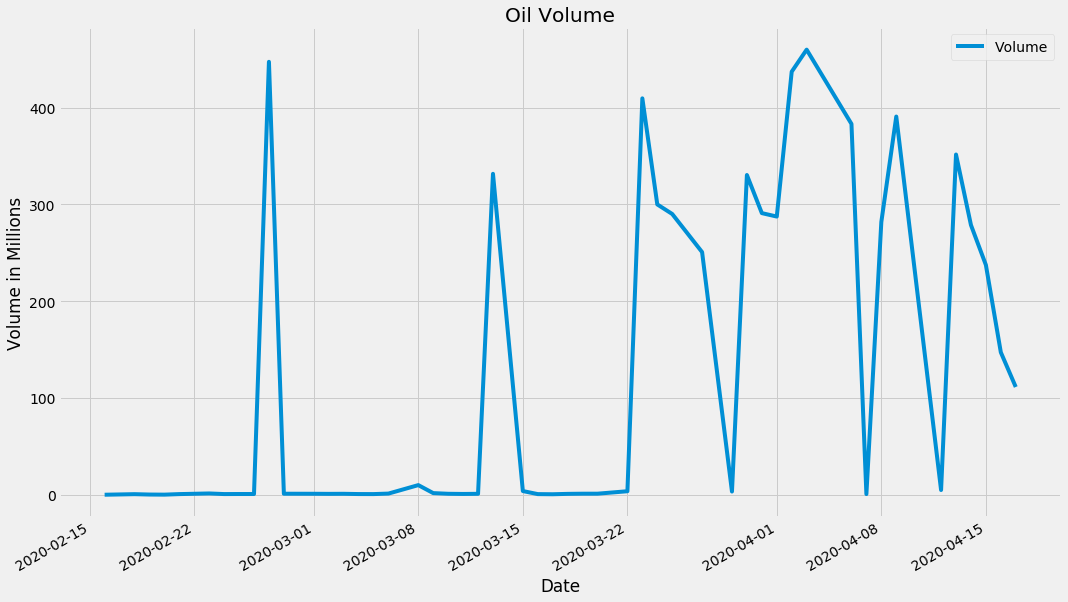

In [10]:
# Oil Volume Graph
oil_v = pd.DataFrame(oil_df['Volume'])
oil_v.plot(figsize= (16,10))
plt.title('Oil Volume')
plt.ylabel('Volume in Millions')
plt.savefig('../WebVisualization/assets/oil_volume.png')

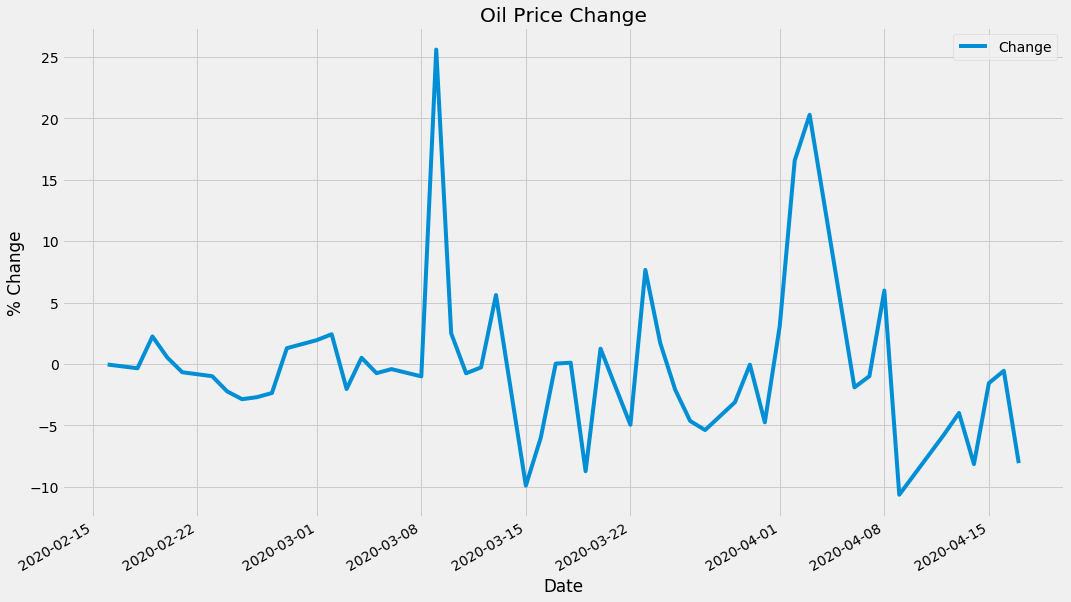

In [11]:
# Oil Price Change Graph
oil_p = pd.DataFrame(oil_df['Change'])
oil_p.plot(figsize= (16,10))
plt.title('Oil Price Change')
plt.ylabel('% Change')
plt.savefig('../WebVisualization/assets/oil_price.png')

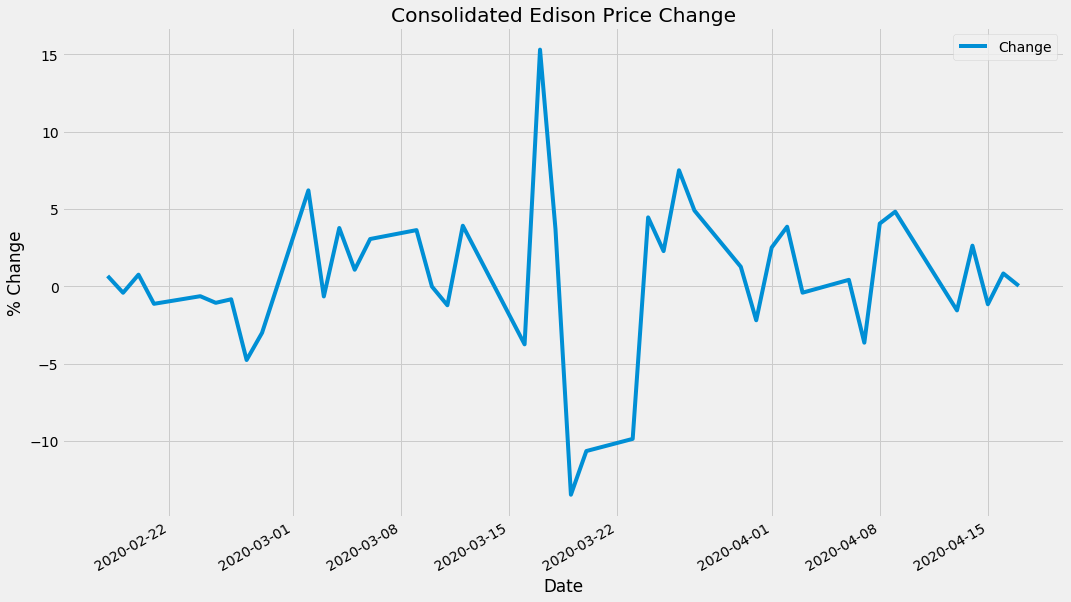

In [12]:
# Consolidated Edison Graph
ed_p = pd.DataFrame(ed_df['Change'])
ed_p.plot(figsize= (16,10))
plt.title('Consolidated Edison Price Change')
plt.ylabel('% Change')
plt.savefig('../WebVisualization/assets/ce_price.png')

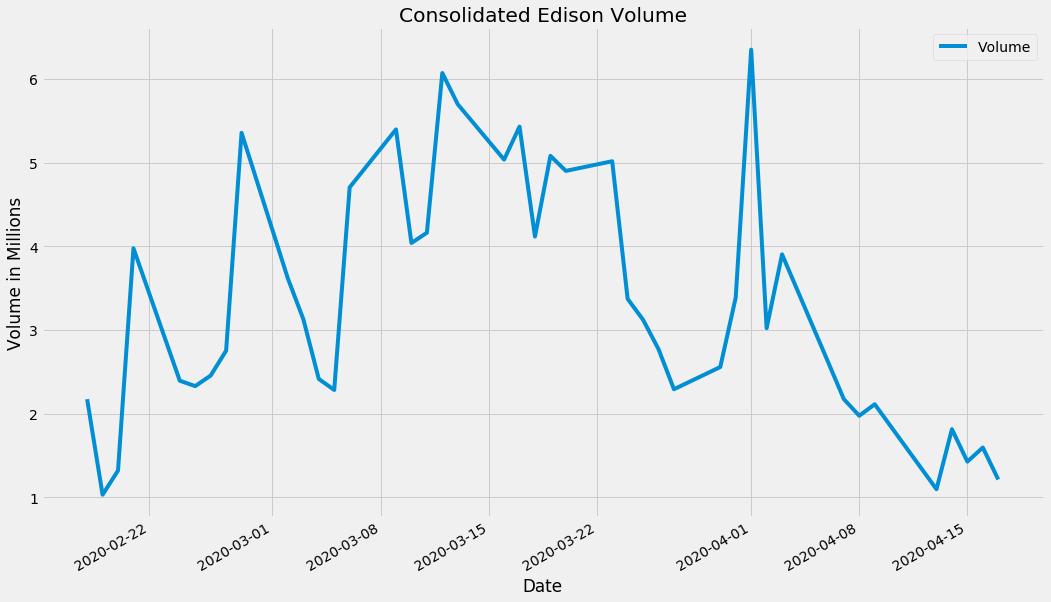

In [13]:
# Consolidated Edison Graph
ed_v = pd.DataFrame(ed_df['Volume'])
ed_v.plot(figsize= (16,10))
plt.title('Consolidated Edison Volume')
plt.ylabel('Volume in Millions')
plt.savefig('../WebVisualization/assets/ce_volume.png')

In [14]:
# Drop index to plot Volume vs Price change
d_index = aapl_df.reset_index()
# aapl_df[['Volume','Change']]
aapl_plot = d_index[['Volume','Change']]

The r-squared is: 0.015865654143153433
0.002158291502663146 0.02124249490389827


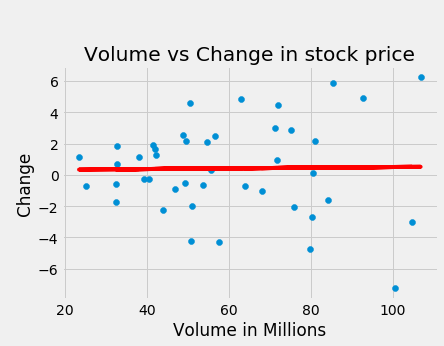

In [15]:
# Volume vs Change in price of apple stock
x_values = aapl_plot['Volume']
y_values = aapl_plot['Change']

plt.scatter(x_values,y_values)#, label='skitscat', color='k', s=25, marker="o")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title('Volume vs Change in stock price')
plt.xlabel('Volume in Millions')
plt.ylabel('Change')
print(f"The r-squared is: {rvalue}")
print(slope, stderr)
plt.savefig('../WebVisualization/assets/Vol_vs_price.png')
plt.show()

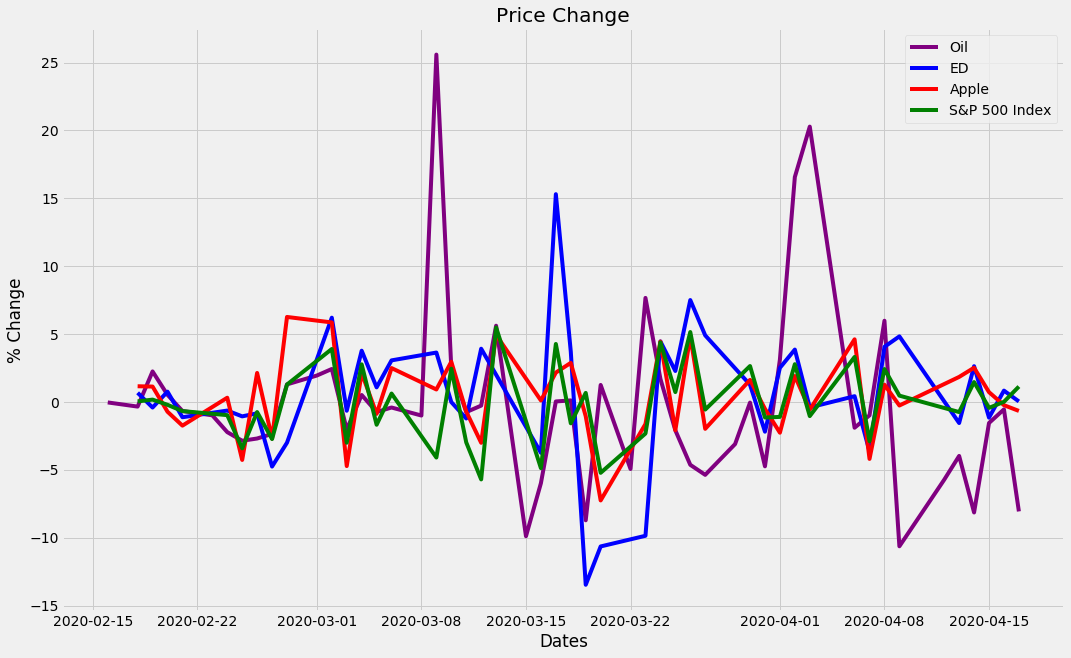

In [16]:
# Change in price of different stocks and see if there is any correlation between them

fig, ax = plt.subplots()
ax.plot(oil_df['Change'], color='purple', label='Oil')
ax.plot(ed_df['Change'], color ='blue', label='ED')
ax.plot(aapl_df['Change'], color ='red', label='Apple')
ax.plot(sp5_df['Change'], color ='green', label='S&P 500 Index')
plt.title('Price Change')
plt.ylabel('% Change')
plt.xlabel('Dates')
plt.plot(rotation=90)
fig.set_size_inches(16, 10)
plt.legend()
plt.savefig('../WebVisualization/assets/Stock_prices.png')

In [17]:
sp_index = sp5_df.reset_index()

In [18]:
sp_index.to_html('table1.html', index=False, classes=['table', 'table-striped', 'table-hover'])